### Data Shifting Experiment

### MIMIC CXR

* [Dataset](https://physionet.org/content/mimic-cxr/2.0.0/)

* [Original Paper](https://www.nature.com/articles/s41597-019-0322-0)

In [1]:
%cd ..

/home/datascience/Data Fusion


In [2]:
import os
import numpy as np
import pandas as pd

from src.classifiers import preprocess_data, process_labels, split_data
from src.classifiers import VQADataset
from torch.utils.data import DataLoader
from src.classifiers import train_early_fusion, train_late_fusion

from utils import normalize_embeddings, modify_and_normalize_embeddings, visualize_embeddings, plot_results

In [3]:
PATH = 'Embeddings_vlm/mimic/'
FILE = 'embeddings_clip.csv'
DATASET = 'mimic'

batch_size = 32

output_size = 4
multilabel = False

num_epochs = 50

In [4]:
df = pd.read_csv(os.path.join(PATH, FILE))
df.drop(columns=['image_id', 'text'], inplace=True)
df.disease_label = df.disease_label.astype(str)
df.head()

path  race_label  sex_label  \
0  p19/p19702416/s51321189/d85c9f15-f0f84927-761f...           0          0   
1  p13/p13339704/s51292704/0024603b-12db30e2-ab32...           2          0   
2  p13/p13339704/s51292704/7953848d-2411f0df-859f...           2          0   
3  p12/p12668169/s54048859/8a4aaaee-55fcf98f-a036...           0          0   
4  p10/p10309415/s58144222/9886b0fe-9121c65e-c8d7...           0          0   

  disease_label  subject_id  study_id  split  \
0             3    19702416  51321189  train   
1             3    13339704  51292704  train   
2             3    13339704  51292704  train   
3             3    12668169  54048859  train   
4             3    10309415  58144222  train   

                                          file_path  image_embedding_0  \
0  datasets/mimic/files/p19/p19702416/s51321189.txt           0.017584   
1  datasets/mimic/files/p13/p13339704/s51292704.txt           0.025167   
2  datasets/mimic/files/p13/p13339704/s51292704.txt           0.027844   
3  datasets/mimic/files/p12/p12668169/s54048859.txt           0.041953   
4  datasets/mimic/files/p10/p10309415/s58144222.txt           0.012712   

   image_embedding_1  ...  text_embedding_502  text_embedding_503  \
0          -0.003019  ...           -0.052364           -0.018894   
1          -0.008093  ...           -0.045582           -0.014851   
2          -0.001912  ...           -0.045582           -0.014851   
3           0.002593  ...           -0.031608           -0.018585   
4           0.006450  ...           -0.038537           -0.009317   

   text_embedding_504  text_embedding_505  text_embedding_506  \
0            0.101141            0.003454           -0.030474   
1            0.052466           -0.013415           -0.023199   
2            0.052466           -0.013415           -0.023199   
3            0.020580            0.012898            0.000496   
4            0.057783           -0.010010           -0.025244   

   text_embedding_507  text_embedding_508  text_embedding_509  \
0            0.013750           -0.007859            0.061135   
1            0.001723            0.004433            0.036226   
2            0.001723            0.004433            0.036226   
3            0.035545            0.023832           -0.059201   
4            0.002658            0.010754            0.027053   

   text_embedding_510  text_embedding_511  
0            0.050736           -0.005674  
1            0.035885           -0.000904  
2            0.035885           -0.000904  
3            0.019583           -0.003538  
4            0.024629            0.007983  

[5 rows x 1032 columns]

In [5]:
# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column]
image_columns = [column for column in df.columns if 'image' in column]
label_columns = 'disease_label'

### Run Experiments

##################################################  Shift -1  ##################################################


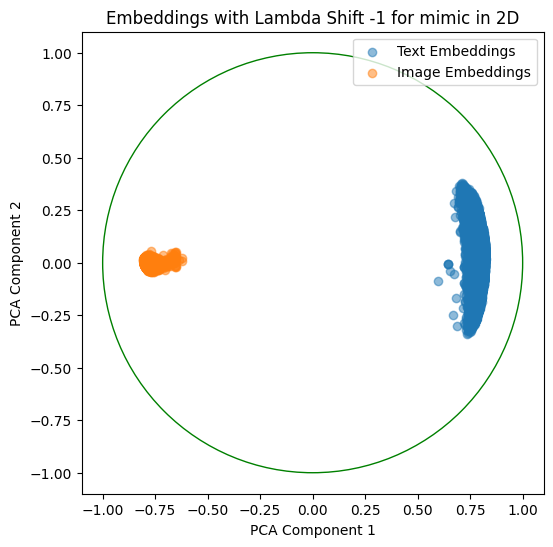

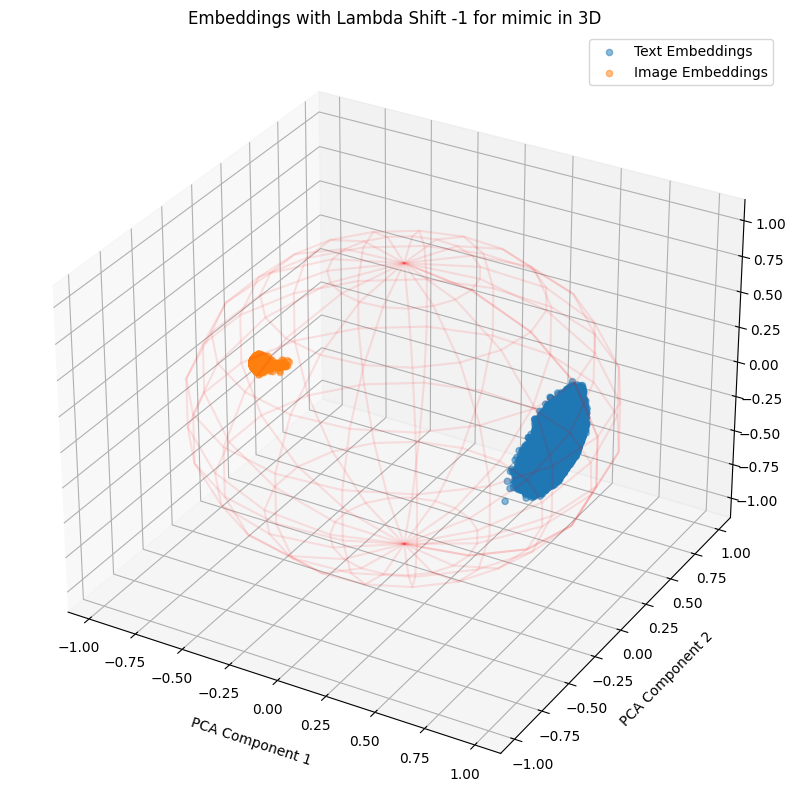

Train Shape: (107695, 1032)
Test Shape: (30360, 1032)
Training Early Fusion Model:
The number of parameters of the model are: 131972
Average Training Time per Epoch: 11.49 seconds
Total Training Time per Epoch: 574.57 seconds
Average Inference Time per Epoch: 1.98 seconds
Total Inference Time per Epoch: 99.11 seconds


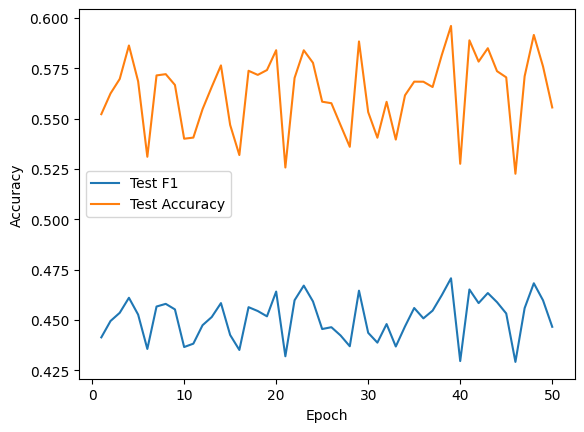

Best Accuracy: {'Acc': 0.5960474308300395, 'F1': 0.4707735956552251, 'Auc': 0.7274636197512069, 'Epoch': 39, 'Auc_Per_Class': array([0.79298077, 0.74521352, 0.68773247, 0.68392772])}
Best Macro-F1: {'Acc': 0.5960474308300395, 'F1': 0.4707735956552251, 'Auc': 0.7274636197512069, 'Epoch': 39, 'Auc_Per_Class': array([0.79298077, 0.74521352, 0.68773247, 0.68392772])}
Best Macro-AUC: {'Acc': 0.5888998682476944, 'F1': 0.46520434102312747, 'Auc': 0.7276973671725325, 'Epoch': 41, 'Auc_Per_Class': array([0.79102457, 0.75511855, 0.68195013, 0.68269622])}
Training Late Fusion Model:
The number of parameters of the model are: 66436
Average Training Time per Epoch: 12.22 seconds
Total Training Time per Epoch: 611.11 seconds
Average Inference Time per Epoch: 2.01 seconds
Total Inference Time per Epoch: 100.60 seconds


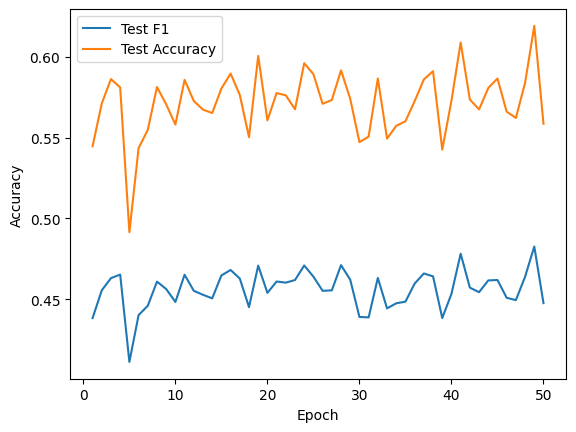

Best Accuracy: {'Acc': 0.6189393939393939, 'F1': 0.4826499354779335, 'Auc': 0.7274570189133575, 'Epoch': 49, 'Auc_Per_Class': array([0.79354045, 0.73834024, 0.68130726, 0.69664011])}
Best Macro-F1: {'Acc': 0.6189393939393939, 'F1': 0.4826499354779335, 'Auc': 0.7274570189133575, 'Epoch': 49, 'Auc_Per_Class': array([0.79354045, 0.73834024, 0.68130726, 0.69664011])}
Best Macro-AUC: {'Acc': 0.5858695652173913, 'F1': 0.46599965919680864, 'Auc': 0.7293617577234897, 'Epoch': 37, 'Auc_Per_Class': array([0.79109257, 0.75193324, 0.69524096, 0.67918026])}
##################################################  Shift -0.8  ##################################################


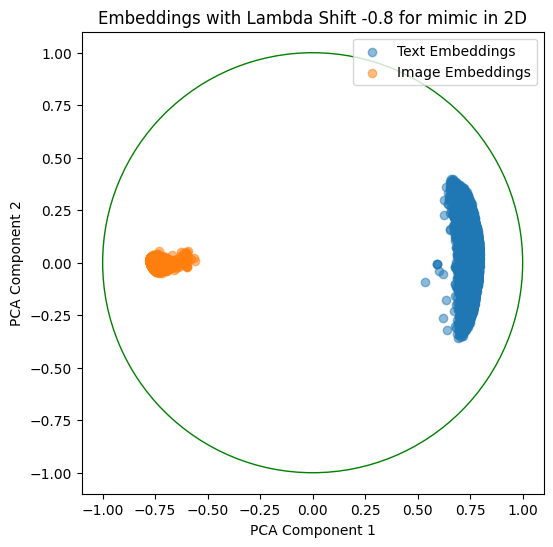

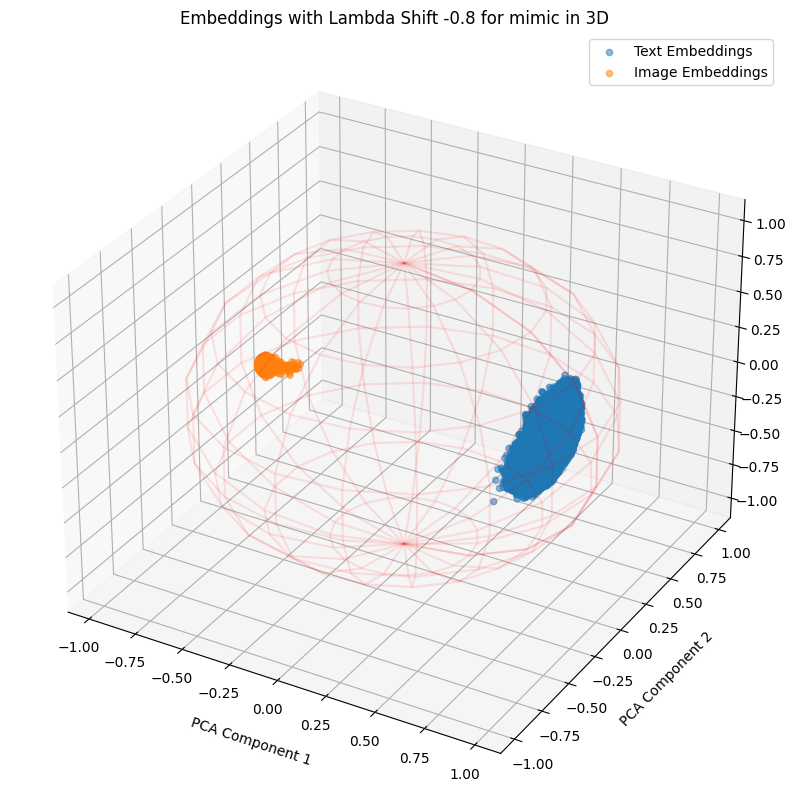

Train Shape: (107695, 1032)
Test Shape: (30360, 1032)
Training Early Fusion Model:
The number of parameters of the model are: 131972
Average Training Time per Epoch: 11.82 seconds
Total Training Time per Epoch: 590.81 seconds
Average Inference Time per Epoch: 2.12 seconds
Total Inference Time per Epoch: 106.06 seconds


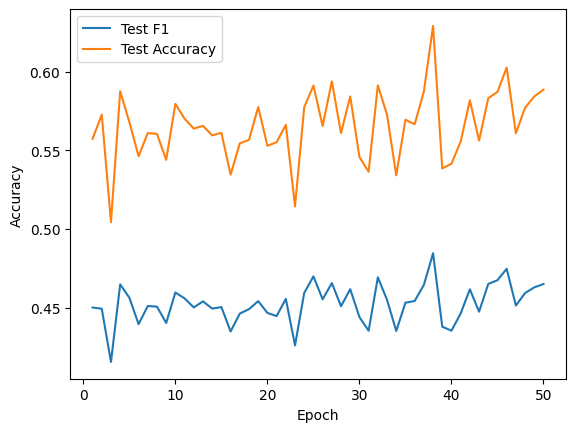

Best Accuracy: {'Acc': 0.6291831357048748, 'F1': 0.4845909613626969, 'Auc': 0.7218249530873648, 'Epoch': 38, 'Auc_Per_Class': array([0.79113017, 0.72220159, 0.67190181, 0.70206624])}
Best Macro-F1: {'Acc': 0.6291831357048748, 'F1': 0.4845909613626969, 'Auc': 0.7218249530873648, 'Epoch': 38, 'Auc_Per_Class': array([0.79113017, 0.72220159, 0.67190181, 0.70206624])}
Best Macro-AUC: {'Acc': 0.5872200263504611, 'F1': 0.46742680839910444, 'Auc': 0.7280510248207712, 'Epoch': 45, 'Auc_Per_Class': array([0.78991321, 0.74430767, 0.69738161, 0.68060161])}
Training Late Fusion Model:
The number of parameters of the model are: 66436
Average Training Time per Epoch: 12.42 seconds
Total Training Time per Epoch: 620.88 seconds
Average Inference Time per Epoch: 2.11 seconds
Total Inference Time per Epoch: 105.33 seconds


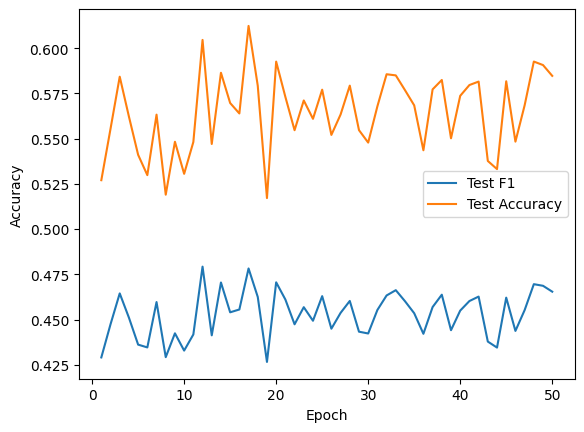

Best Accuracy: {'Acc': 0.6123188405797102, 'F1': 0.4782528493521196, 'Auc': 0.7275222265836063, 'Epoch': 17, 'Auc_Per_Class': array([0.78931617, 0.74467665, 0.68184964, 0.69424644])}
Best Macro-F1: {'Acc': 0.6045783926218709, 'F1': 0.4792593512834148, 'Auc': 0.7244613604372225, 'Epoch': 12, 'Auc_Per_Class': array([0.79228569, 0.71872558, 0.69997313, 0.68686104])}
Best Macro-AUC: {'Acc': 0.5926218708827404, 'F1': 0.46956959937573894, 'Auc': 0.7285698862715468, 'Epoch': 48, 'Auc_Per_Class': array([0.79420266, 0.74471759, 0.6936608 , 0.68169849])}
##################################################  Shift -0.6  ##################################################


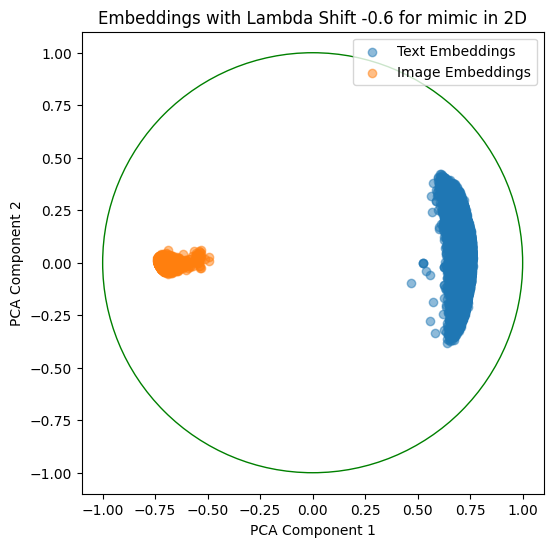

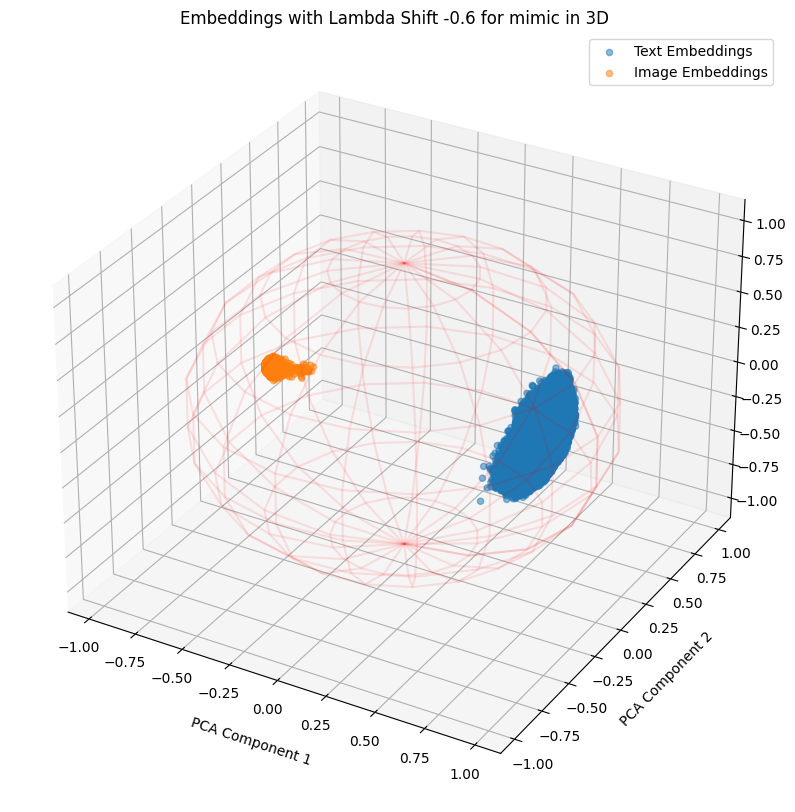

Train Shape: (107695, 1032)
Test Shape: (30360, 1032)
Training Early Fusion Model:
The number of parameters of the model are: 131972
Average Training Time per Epoch: 11.98 seconds
Total Training Time per Epoch: 598.84 seconds
Average Inference Time per Epoch: 2.10 seconds
Total Inference Time per Epoch: 104.89 seconds


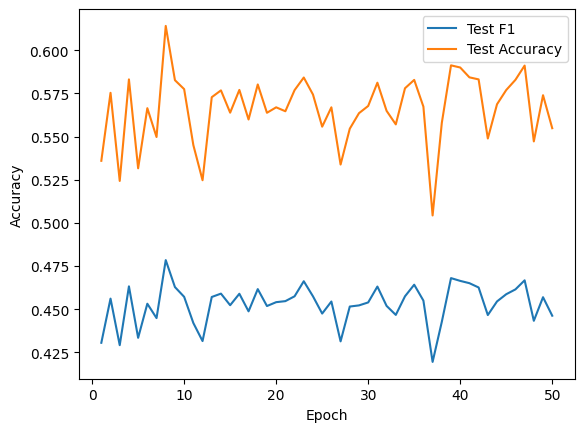

Best Accuracy: {'Acc': 0.614064558629776, 'F1': 0.4784639737419595, 'Auc': 0.7261665228437432, 'Epoch': 8, 'Auc_Per_Class': array([0.79304337, 0.74058033, 0.67518448, 0.69585791])}
Best Macro-F1: {'Acc': 0.614064558629776, 'F1': 0.4784639737419595, 'Auc': 0.7261665228437432, 'Epoch': 8, 'Auc_Per_Class': array([0.79304337, 0.74058033, 0.67518448, 0.69585791])}
Best Macro-AUC: {'Acc': 0.580171277997365, 'F1': 0.46167370356996507, 'Auc': 0.7281945256689177, 'Epoch': 18, 'Auc_Per_Class': array([0.79138814, 0.75604644, 0.6896803 , 0.67566321])}
Training Late Fusion Model:
The number of parameters of the model are: 66436
Average Training Time per Epoch: 12.10 seconds
Total Training Time per Epoch: 604.75 seconds
Average Inference Time per Epoch: 2.09 seconds
Total Inference Time per Epoch: 104.49 seconds


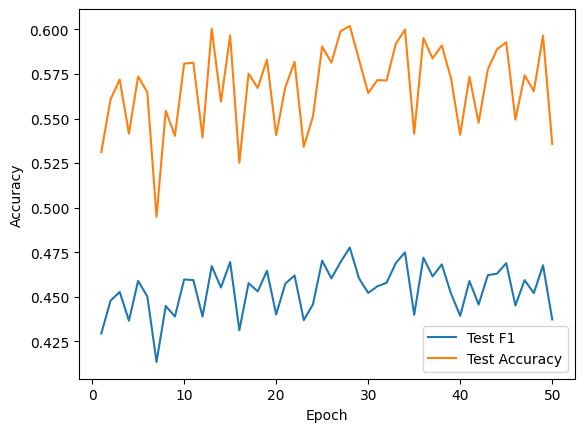

Best Accuracy: {'Acc': 0.6019762845849802, 'F1': 0.47755063045498863, 'Auc': 0.7275927396975135, 'Epoch': 28, 'Auc_Per_Class': array([0.79554629, 0.73542515, 0.69417366, 0.68522586])}
Best Macro-F1: {'Acc': 0.6019762845849802, 'F1': 0.47755063045498863, 'Auc': 0.7275927396975135, 'Epoch': 28, 'Auc_Per_Class': array([0.79554629, 0.73542515, 0.69417366, 0.68522586])}
Best Macro-AUC: {'Acc': 0.5998682476943347, 'F1': 0.4748656886398761, 'Auc': 0.7312534273789297, 'Epoch': 34, 'Auc_Per_Class': array([0.78794635, 0.75134369, 0.69794716, 0.68777651])}
##################################################  Shift -0.4  ##################################################


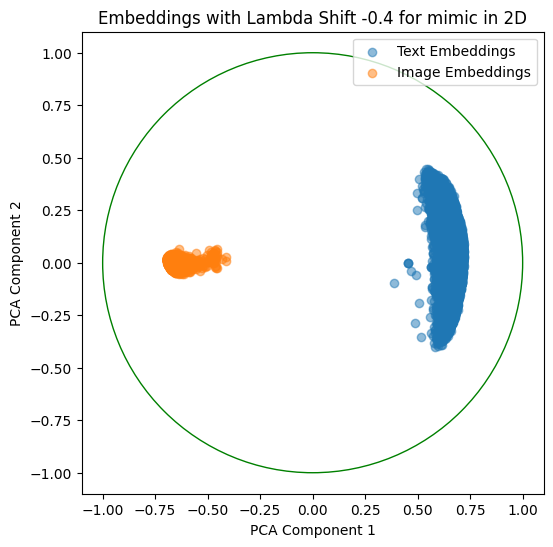

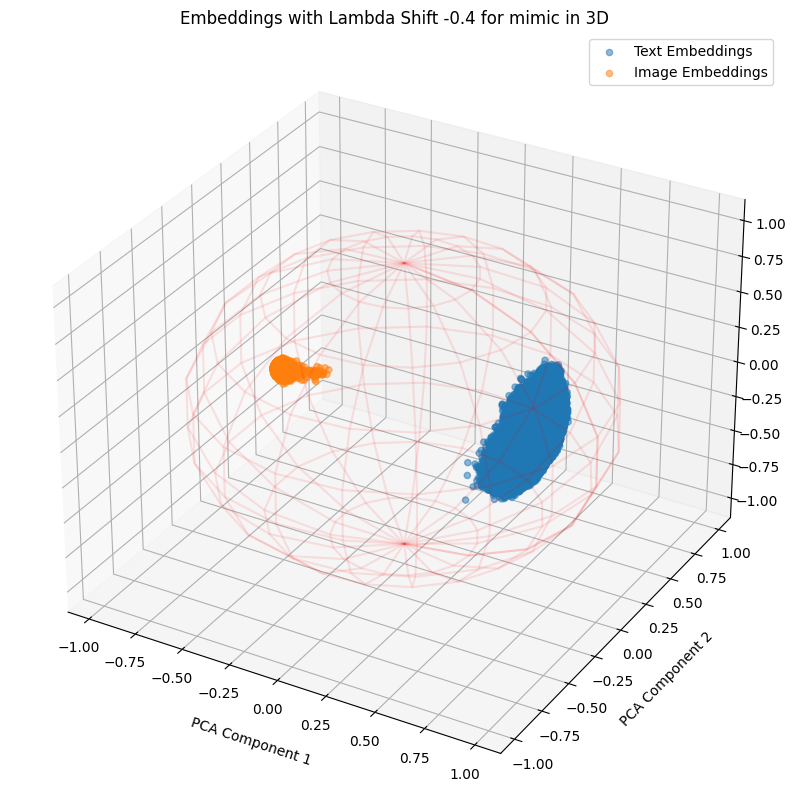

Train Shape: (107695, 1032)
Test Shape: (30360, 1032)
Training Early Fusion Model:
The number of parameters of the model are: 131972
Average Training Time per Epoch: 11.52 seconds
Total Training Time per Epoch: 576.21 seconds
Average Inference Time per Epoch: 2.03 seconds
Total Inference Time per Epoch: 101.61 seconds


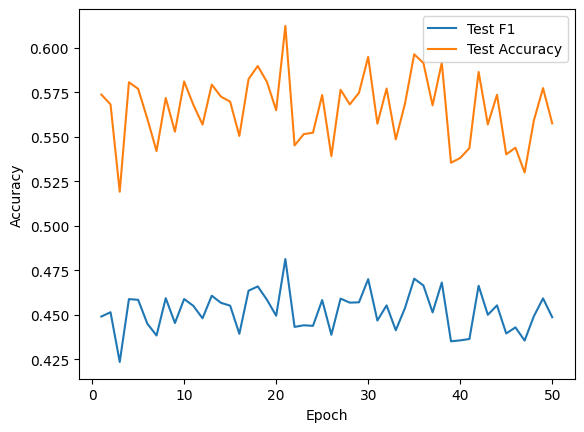

Best Accuracy: {'Acc': 0.6122200263504611, 'F1': 0.4813670205842011, 'Auc': 0.7261914835824408, 'Epoch': 21, 'Auc_Per_Class': array([0.79125773, 0.72697862, 0.69610095, 0.69042864])}
Best Macro-F1: {'Acc': 0.6122200263504611, 'F1': 0.4813670205842011, 'Auc': 0.7261914835824408, 'Epoch': 21, 'Auc_Per_Class': array([0.79125773, 0.72697862, 0.69610095, 0.69042864])}
Best Macro-AUC: {'Acc': 0.5681818181818182, 'F1': 0.4568940510214839, 'Auc': 0.7283750722194395, 'Epoch': 28, 'Auc_Per_Class': array([0.7873087 , 0.75403821, 0.69998422, 0.67216916])}
Training Late Fusion Model:
The number of parameters of the model are: 66436
Average Training Time per Epoch: 12.11 seconds
Total Training Time per Epoch: 605.74 seconds
Average Inference Time per Epoch: 2.06 seconds
Total Inference Time per Epoch: 102.96 seconds


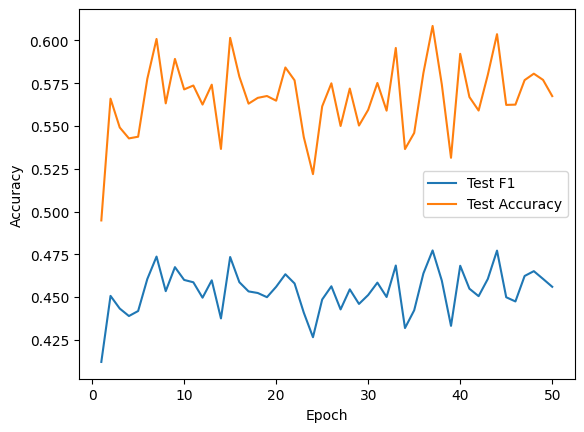

Best Accuracy: {'Acc': 0.6084321475625823, 'F1': 0.4772735860355364, 'Auc': 0.7240745986444682, 'Epoch': 37, 'Auc_Per_Class': array([0.79063567, 0.73221623, 0.68466218, 0.68878431])}
Best Macro-F1: {'Acc': 0.6084321475625823, 'F1': 0.4772735860355364, 'Auc': 0.7240745986444682, 'Epoch': 37, 'Auc_Per_Class': array([0.79063567, 0.73221623, 0.68466218, 0.68878431])}
Best Macro-AUC: {'Acc': 0.6036231884057971, 'F1': 0.47716541527991796, 'Auc': 0.7287490056779887, 'Epoch': 44, 'Auc_Per_Class': array([0.79466714, 0.7357409 , 0.6967381 , 0.68784988])}
##################################################  Shift -0.2  ##################################################


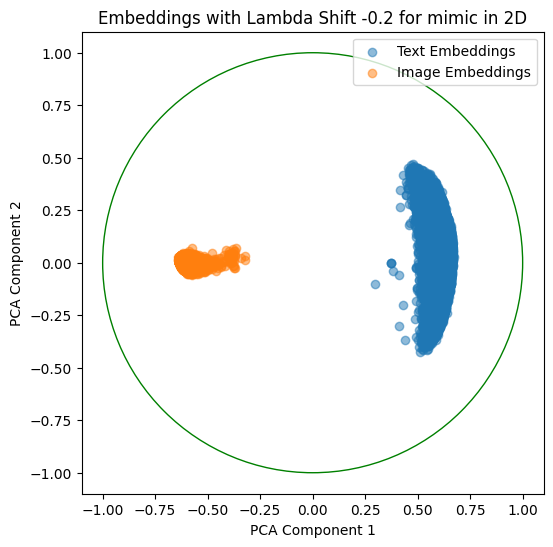

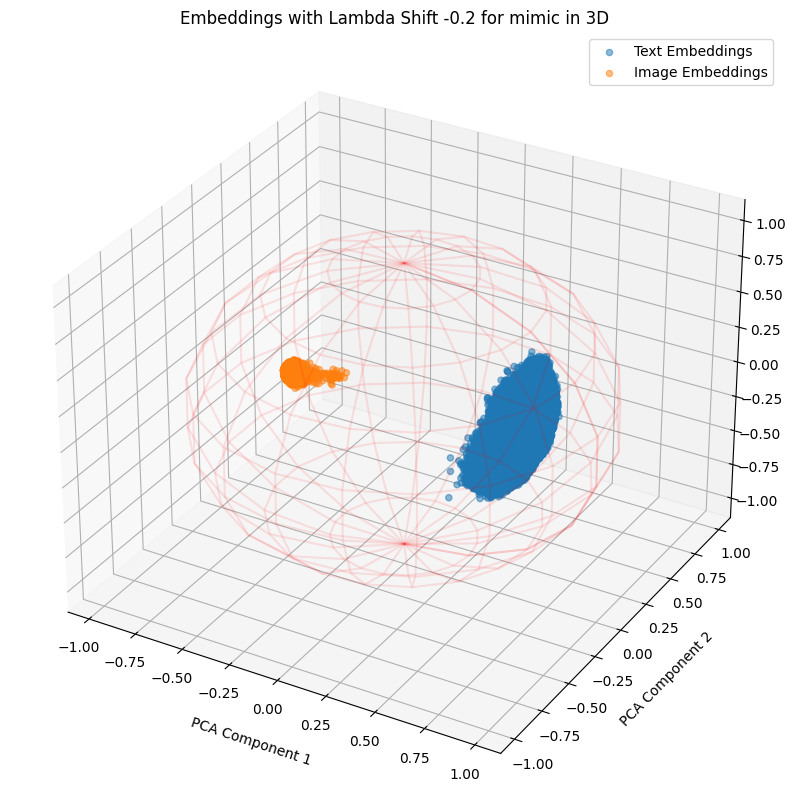

Train Shape: (107695, 1032)
Test Shape: (30360, 1032)
Training Early Fusion Model:
The number of parameters of the model are: 131972
Average Training Time per Epoch: 11.44 seconds
Total Training Time per Epoch: 572.02 seconds
Average Inference Time per Epoch: 2.06 seconds
Total Inference Time per Epoch: 102.80 seconds


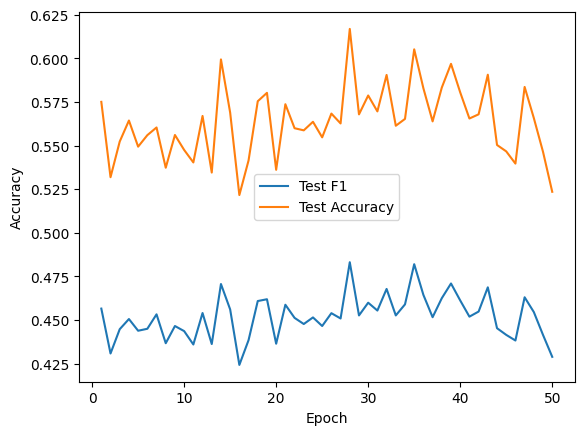

Best Accuracy: {'Acc': 0.6168972332015811, 'F1': 0.4830863773618256, 'Auc': 0.7287628931265256, 'Epoch': 28, 'Auc_Per_Class': array([0.79330207, 0.73878193, 0.68663172, 0.69633585])}
Best Macro-F1: {'Acc': 0.6168972332015811, 'F1': 0.4830863773618256, 'Auc': 0.7287628931265256, 'Epoch': 28, 'Auc_Per_Class': array([0.79330207, 0.73878193, 0.68663172, 0.69633585])}
Best Macro-AUC: {'Acc': 0.6168972332015811, 'F1': 0.4830863773618256, 'Auc': 0.7287628931265256, 'Epoch': 28, 'Auc_Per_Class': array([0.79330207, 0.73878193, 0.68663172, 0.69633585])}
Training Late Fusion Model:
The number of parameters of the model are: 66436
Average Training Time per Epoch: 12.11 seconds
Total Training Time per Epoch: 605.33 seconds
Average Inference Time per Epoch: 2.09 seconds
Total Inference Time per Epoch: 104.36 seconds


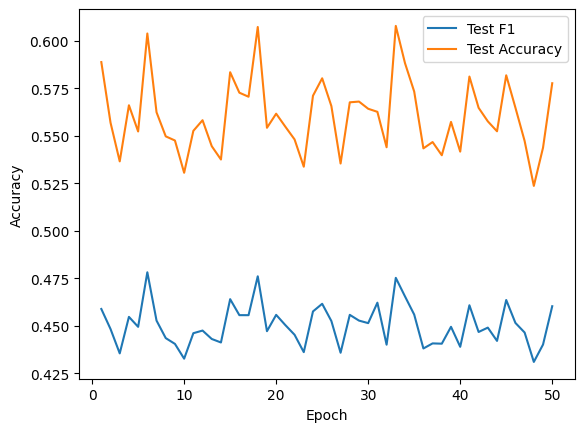

Best Accuracy: {'Acc': 0.6077733860342556, 'F1': 0.47515597948716903, 'Auc': 0.7201686251355435, 'Epoch': 33, 'Auc_Per_Class': array([0.79024843, 0.71485184, 0.68665683, 0.6889174 ])}
Best Macro-F1: {'Acc': 0.6037878787878788, 'F1': 0.47809285618093555, 'Auc': 0.7287093644162403, 'Epoch': 6, 'Auc_Per_Class': array([0.78924576, 0.72787474, 0.70865318, 0.68906378])}
Best Macro-AUC: {'Acc': 0.6037878787878788, 'F1': 0.47809285618093555, 'Auc': 0.7287093644162403, 'Epoch': 6, 'Auc_Per_Class': array([0.78924576, 0.72787474, 0.70865318, 0.68906378])}
##################################################  Shift 0  ##################################################


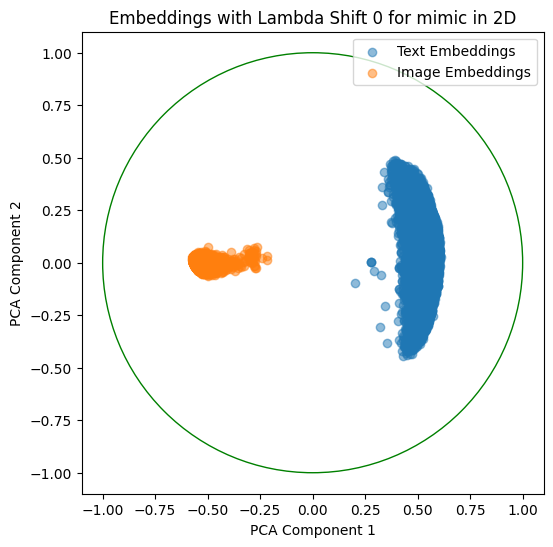

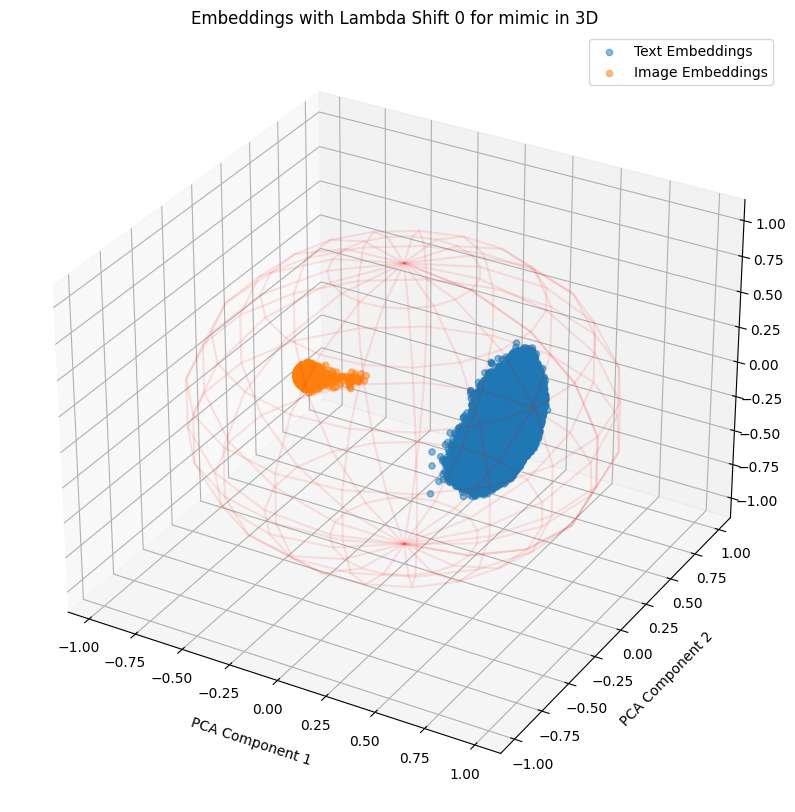

Train Shape: (107695, 1032)
Test Shape: (30360, 1032)
Training Early Fusion Model:
The number of parameters of the model are: 131972
Average Training Time per Epoch: 11.48 seconds
Total Training Time per Epoch: 574.03 seconds
Average Inference Time per Epoch: 2.05 seconds
Total Inference Time per Epoch: 102.53 seconds


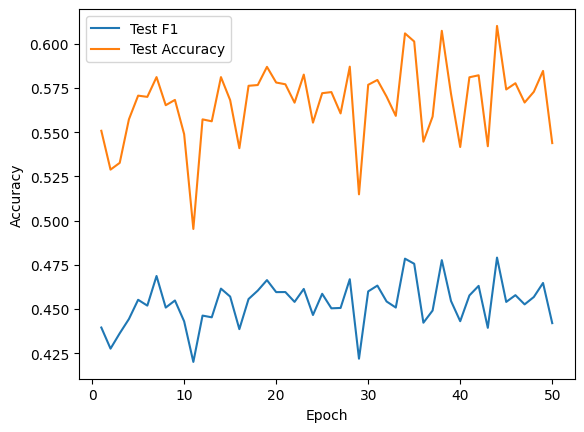

Best Accuracy: {'Acc': 0.6100131752305665, 'F1': 0.47909945359201256, 'Auc': 0.7274811254162763, 'Epoch': 44, 'Auc_Per_Class': array([0.7885703 , 0.73144392, 0.69833474, 0.69157554])}
Best Macro-F1: {'Acc': 0.6100131752305665, 'F1': 0.47909945359201256, 'Auc': 0.7274811254162763, 'Epoch': 44, 'Auc_Per_Class': array([0.7885703 , 0.73144392, 0.69833474, 0.69157554])}
Best Macro-AUC: {'Acc': 0.6057971014492753, 'F1': 0.47850695243983665, 'Auc': 0.7296738632118256, 'Epoch': 34, 'Auc_Per_Class': array([0.7930554 , 0.74162388, 0.69515859, 0.68885759])}
Training Late Fusion Model:
The number of parameters of the model are: 66436
Average Training Time per Epoch: 12.05 seconds
Total Training Time per Epoch: 602.34 seconds
Average Inference Time per Epoch: 2.06 seconds
Total Inference Time per Epoch: 103.06 seconds


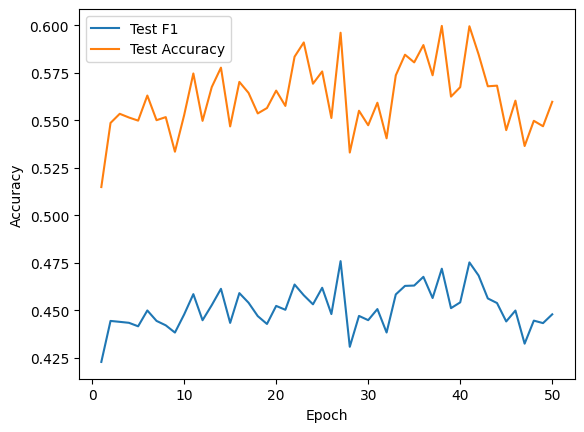

Best Accuracy: {'Acc': 0.599703557312253, 'F1': 0.4718524213724377, 'Auc': 0.7265903651009504, 'Epoch': 38, 'Auc_Per_Class': array([0.78050642, 0.75171726, 0.68915359, 0.68498419])}
Best Macro-F1: {'Acc': 0.5961133069828722, 'F1': 0.47583890000638374, 'Auc': 0.7246222152424491, 'Epoch': 27, 'Auc_Per_Class': array([0.79156705, 0.72941936, 0.69587616, 0.68162628])}
Best Macro-AUC: {'Acc': 0.5995388669301713, 'F1': 0.47517390521798897, 'Auc': 0.7287503807223574, 'Epoch': 41, 'Auc_Per_Class': array([0.78971615, 0.73971183, 0.70067798, 0.68489556])}
##################################################  Shift 0.2  ##################################################


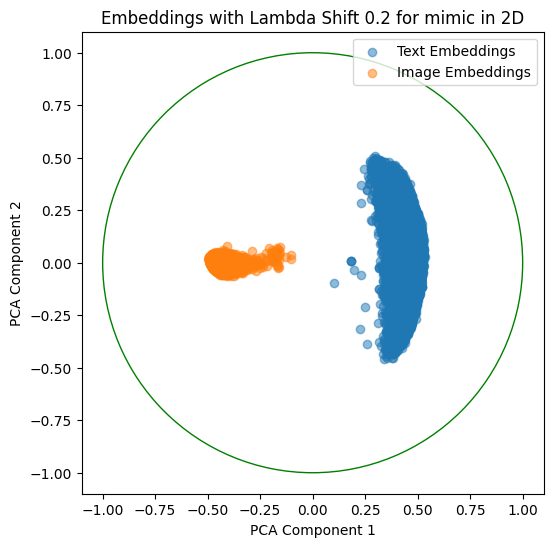

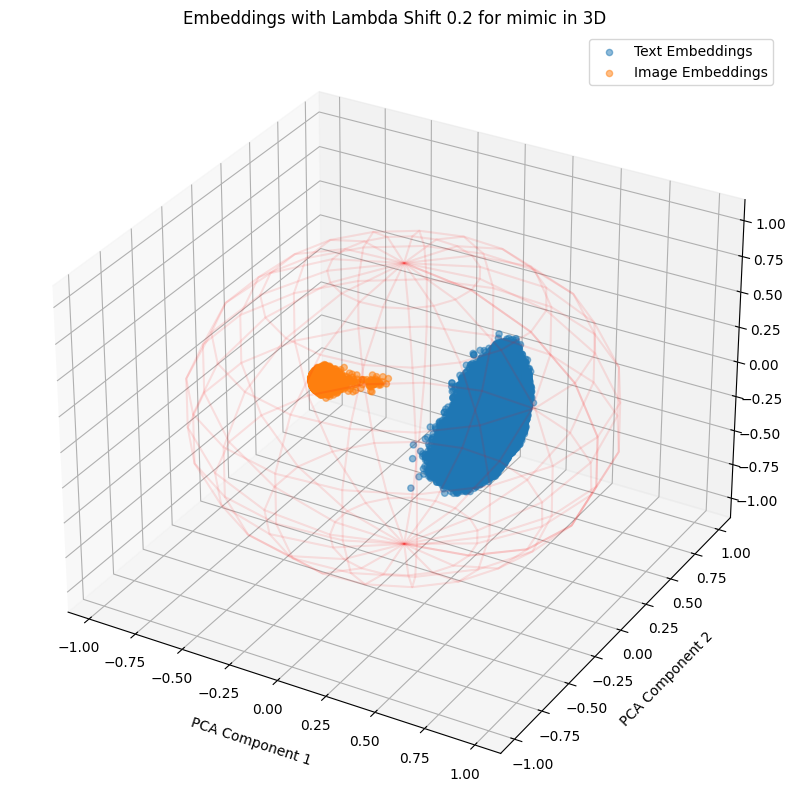

Train Shape: (107695, 1032)
Test Shape: (30360, 1032)
Training Early Fusion Model:
The number of parameters of the model are: 131972
Average Training Time per Epoch: 11.55 seconds
Total Training Time per Epoch: 577.42 seconds
Average Inference Time per Epoch: 2.04 seconds
Total Inference Time per Epoch: 101.99 seconds


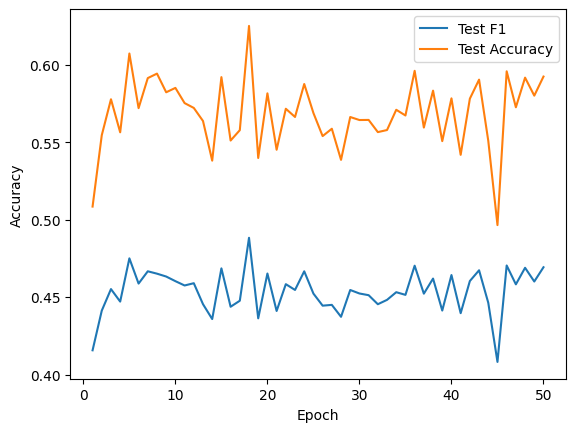

Best Accuracy: {'Acc': 0.6251317523056653, 'F1': 0.48831398925429703, 'Auc': 0.7261542392363277, 'Epoch': 18, 'Auc_Per_Class': array([0.79277637, 0.72008129, 0.69308482, 0.69867447])}
Best Macro-F1: {'Acc': 0.6251317523056653, 'F1': 0.48831398925429703, 'Auc': 0.7261542392363277, 'Epoch': 18, 'Auc_Per_Class': array([0.79277637, 0.72008129, 0.69308482, 0.69867447])}
Best Macro-AUC: {'Acc': 0.5958168642951251, 'F1': 0.47042947330398366, 'Auc': 0.7275635634613554, 'Epoch': 46, 'Auc_Per_Class': array([0.79156013, 0.74433272, 0.690607  , 0.6837544 ])}
Training Late Fusion Model:
The number of parameters of the model are: 66436
Average Training Time per Epoch: 11.95 seconds
Total Training Time per Epoch: 597.27 seconds
Average Inference Time per Epoch: 2.09 seconds
Total Inference Time per Epoch: 104.27 seconds


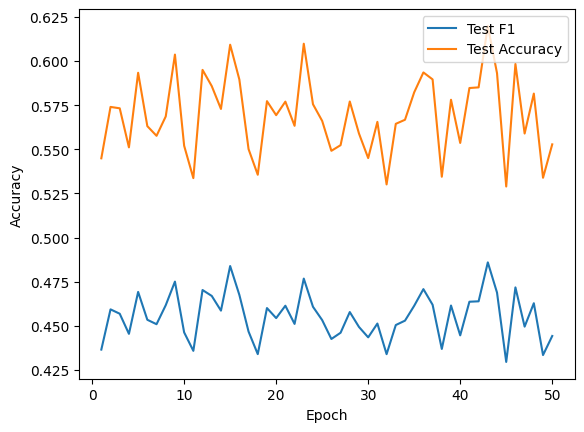

Best Accuracy: {'Acc': 0.6198945981554678, 'F1': 0.4859347271300488, 'Auc': 0.7256970186733472, 'Epoch': 43, 'Auc_Per_Class': array([0.79038901, 0.72715981, 0.68907789, 0.69616136])}
Best Macro-F1: {'Acc': 0.6198945981554678, 'F1': 0.4859347271300488, 'Auc': 0.7256970186733472, 'Epoch': 43, 'Auc_Per_Class': array([0.79038901, 0.72715981, 0.68907789, 0.69616136])}
Best Macro-AUC: {'Acc': 0.6036561264822135, 'F1': 0.47504295270860064, 'Auc': 0.730126811363409, 'Epoch': 9, 'Auc_Per_Class': array([0.78071361, 0.75314567, 0.69364955, 0.69299842])}
##################################################  Shift 0.4  ##################################################


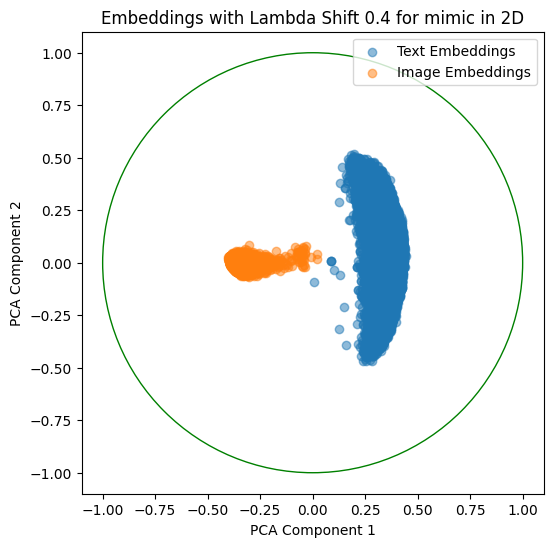

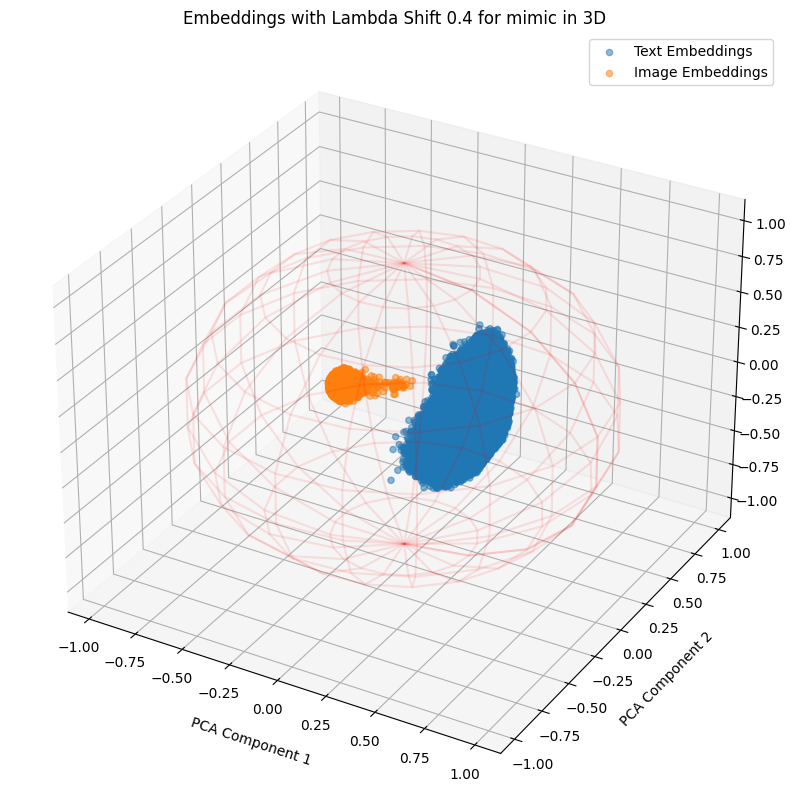

Train Shape: (107695, 1032)
Test Shape: (30360, 1032)
Training Early Fusion Model:
The number of parameters of the model are: 131972
Average Training Time per Epoch: 11.46 seconds
Total Training Time per Epoch: 572.81 seconds
Average Inference Time per Epoch: 2.01 seconds
Total Inference Time per Epoch: 100.61 seconds


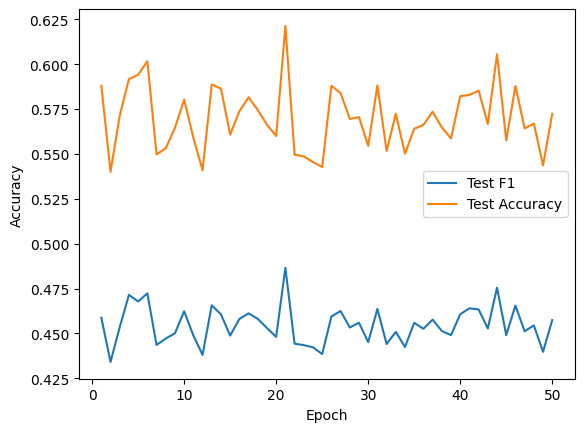

Best Accuracy: {'Acc': 0.6213109354413702, 'F1': 0.48657586074493564, 'Auc': 0.7253330084695208, 'Epoch': 21, 'Auc_Per_Class': array([0.79130947, 0.72873765, 0.68569768, 0.69558724])}
Best Macro-F1: {'Acc': 0.6213109354413702, 'F1': 0.48657586074493564, 'Auc': 0.7253330084695208, 'Epoch': 21, 'Auc_Per_Class': array([0.79130947, 0.72873765, 0.68569768, 0.69558724])}
Best Macro-AUC: {'Acc': 0.5828722002635046, 'F1': 0.46402163746859637, 'Auc': 0.7289627969550917, 'Epoch': 41, 'Auc_Per_Class': array([0.78772028, 0.75435195, 0.69417284, 0.67960611])}
Training Late Fusion Model:
The number of parameters of the model are: 66436
Average Training Time per Epoch: 12.08 seconds
Total Training Time per Epoch: 604.19 seconds
Average Inference Time per Epoch: 2.06 seconds
Total Inference Time per Epoch: 102.90 seconds


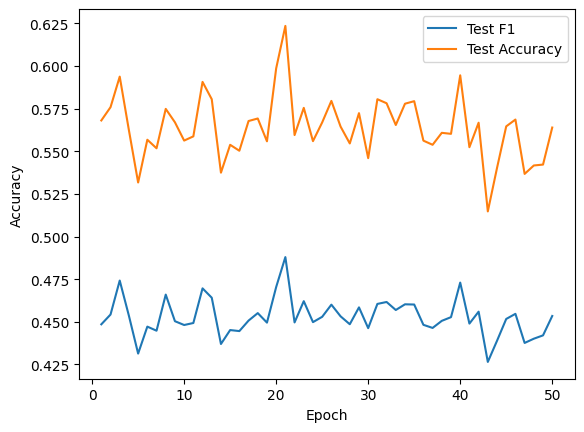

Best Accuracy: {'Acc': 0.6234189723320158, 'F1': 0.4879430701062131, 'Auc': 0.7299053305642853, 'Epoch': 21, 'Auc_Per_Class': array([0.79096524, 0.7386627 , 0.68918262, 0.70081076])}
Best Macro-F1: {'Acc': 0.6234189723320158, 'F1': 0.4879430701062131, 'Auc': 0.7299053305642853, 'Epoch': 21, 'Auc_Per_Class': array([0.79096524, 0.7386627 , 0.68918262, 0.70081076])}
Best Macro-AUC: {'Acc': 0.5944664031620553, 'F1': 0.4730034883566643, 'Auc': 0.7310142979524995, 'Epoch': 40, 'Auc_Per_Class': array([0.79272654, 0.75317385, 0.69659374, 0.68156306])}
##################################################  Shift 0.6  ##################################################


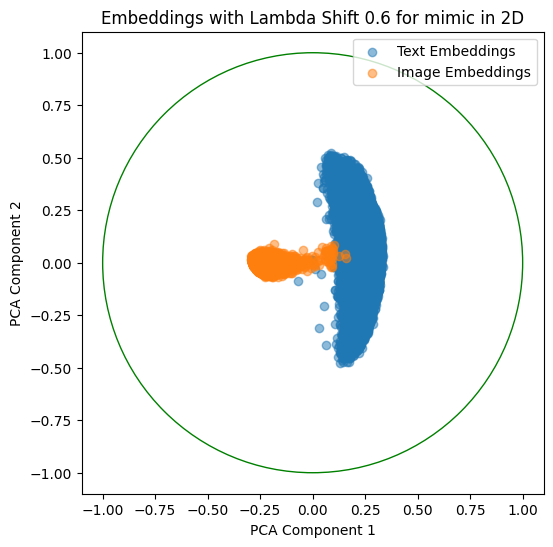

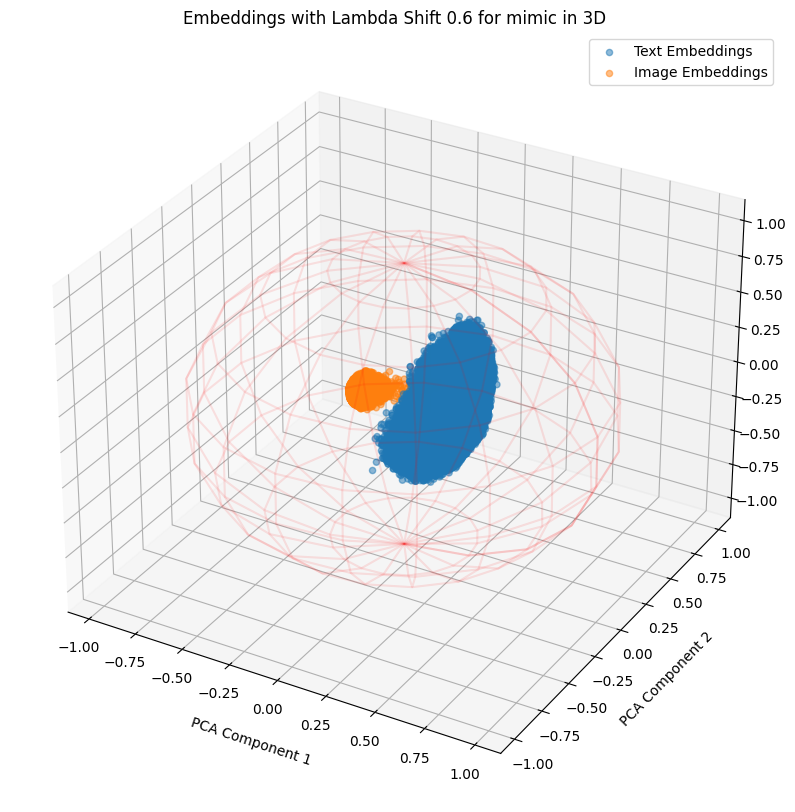

Train Shape: (107695, 1032)
Test Shape: (30360, 1032)
Training Early Fusion Model:
The number of parameters of the model are: 131972
Average Training Time per Epoch: 11.48 seconds
Total Training Time per Epoch: 574.21 seconds
Average Inference Time per Epoch: 2.03 seconds
Total Inference Time per Epoch: 101.53 seconds


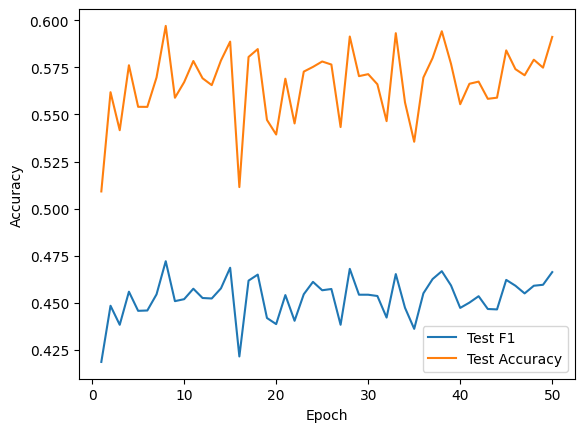

Best Accuracy: {'Acc': 0.5969367588932807, 'F1': 0.4720992948783708, 'Auc': 0.7243435394696365, 'Epoch': 8, 'Auc_Per_Class': array([0.78909884, 0.73249362, 0.69369848, 0.68208321])}
Best Macro-F1: {'Acc': 0.5969367588932807, 'F1': 0.4720992948783708, 'Auc': 0.7243435394696365, 'Epoch': 8, 'Auc_Per_Class': array([0.78909884, 0.73249362, 0.69369848, 0.68208321])}
Best Macro-AUC: {'Acc': 0.5748023715415019, 'F1': 0.45960078823560313, 'Auc': 0.7270135616008058, 'Epoch': 49, 'Auc_Per_Class': array([0.79261126, 0.74817828, 0.69640582, 0.6708589 ])}
Training Late Fusion Model:
The number of parameters of the model are: 66436
Average Training Time per Epoch: 12.05 seconds
Total Training Time per Epoch: 602.74 seconds
Average Inference Time per Epoch: 2.05 seconds
Total Inference Time per Epoch: 102.63 seconds


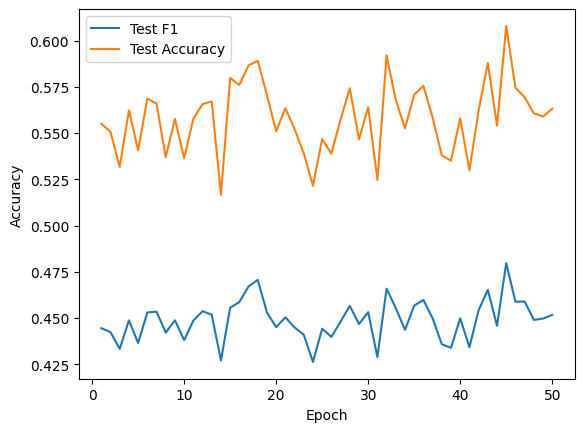

Best Accuracy: {'Acc': 0.6079710144927536, 'F1': 0.4796942722363869, 'Auc': 0.7297990082176262, 'Epoch': 45, 'Auc_Per_Class': array([0.794214  , 0.7293451 , 0.70429668, 0.69134025])}
Best Macro-F1: {'Acc': 0.6079710144927536, 'F1': 0.4796942722363869, 'Auc': 0.7297990082176262, 'Epoch': 45, 'Auc_Per_Class': array([0.794214  , 0.7293451 , 0.70429668, 0.69134025])}
Best Macro-AUC: {'Acc': 0.6079710144927536, 'F1': 0.4796942722363869, 'Auc': 0.7297990082176262, 'Epoch': 45, 'Auc_Per_Class': array([0.794214  , 0.7293451 , 0.70429668, 0.69134025])}
##################################################  Shift 0.8  ##################################################


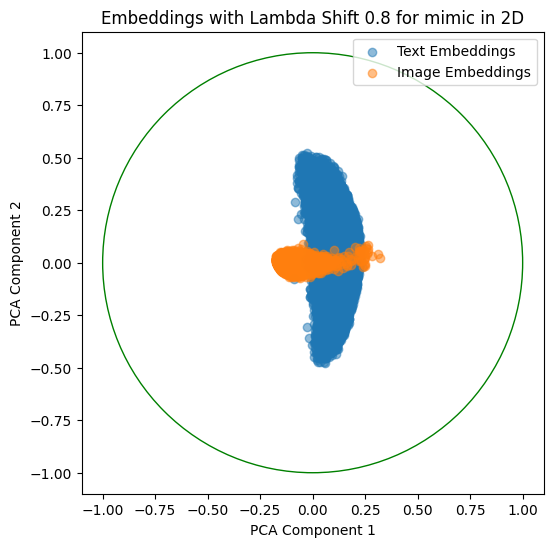

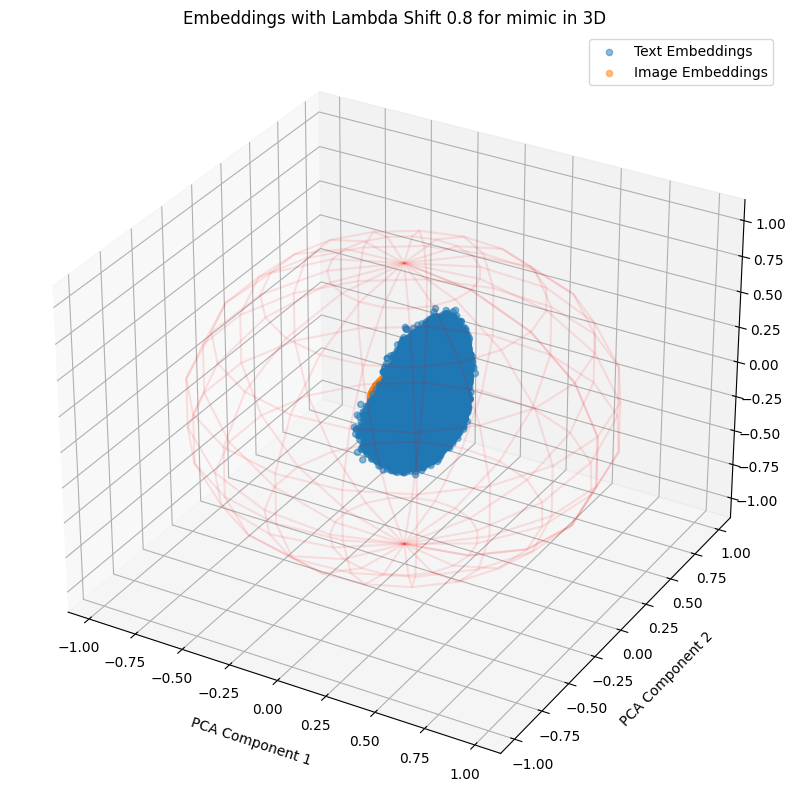

Train Shape: (107695, 1032)
Test Shape: (30360, 1032)
Training Early Fusion Model:
The number of parameters of the model are: 131972
Average Training Time per Epoch: 11.45 seconds
Total Training Time per Epoch: 572.43 seconds
Average Inference Time per Epoch: 2.01 seconds
Total Inference Time per Epoch: 100.35 seconds


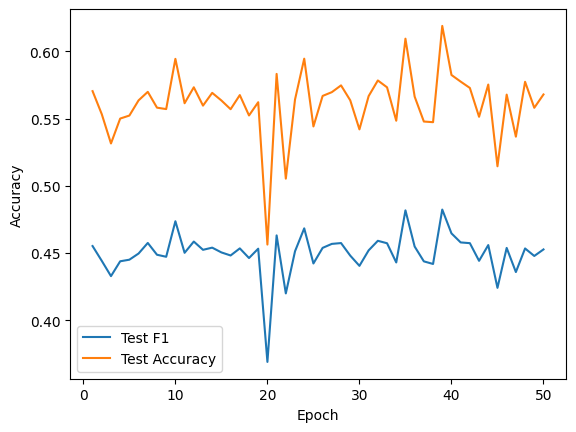

Best Accuracy: {'Acc': 0.618840579710145, 'F1': 0.48230457098998203, 'Auc': 0.7254566144406411, 'Epoch': 39, 'Auc_Per_Class': array([0.79319244, 0.72980725, 0.68224439, 0.69658237])}
Best Macro-F1: {'Acc': 0.618840579710145, 'F1': 0.48230457098998203, 'Auc': 0.7254566144406411, 'Epoch': 39, 'Auc_Per_Class': array([0.79319244, 0.72980725, 0.68224439, 0.69658237])}
Best Macro-AUC: {'Acc': 0.6093544137022397, 'F1': 0.48172374714165145, 'Auc': 0.7275748084241123, 'Epoch': 35, 'Auc_Per_Class': array([0.78602535, 0.7331175 , 0.69986498, 0.6912914 ])}
Training Late Fusion Model:
The number of parameters of the model are: 66436
Average Training Time per Epoch: 12.05 seconds
Total Training Time per Epoch: 602.72 seconds
Average Inference Time per Epoch: 2.08 seconds
Total Inference Time per Epoch: 104.06 seconds


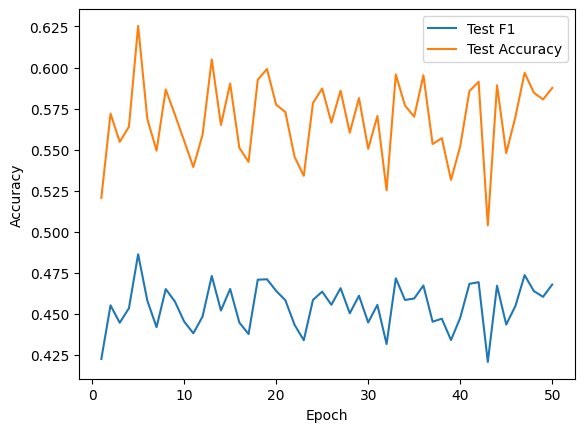

Best Accuracy: {'Acc': 0.6253293807641633, 'F1': 0.486366658211327, 'Auc': 0.7261340589075249, 'Epoch': 5, 'Auc_Per_Class': array([0.78306506, 0.73745385, 0.68586211, 0.69815522])}
Best Macro-F1: {'Acc': 0.6253293807641633, 'F1': 0.486366658211327, 'Auc': 0.7261340589075249, 'Epoch': 5, 'Auc_Per_Class': array([0.78306506, 0.73745385, 0.68586211, 0.69815522])}
Best Macro-AUC: {'Acc': 0.5856389986824769, 'F1': 0.46837194058580955, 'Auc': 0.7304016185176203, 'Epoch': 41, 'Auc_Per_Class': array([0.79359902, 0.75000487, 0.70090537, 0.67709722])}
##################################################  Shift 1  ##################################################


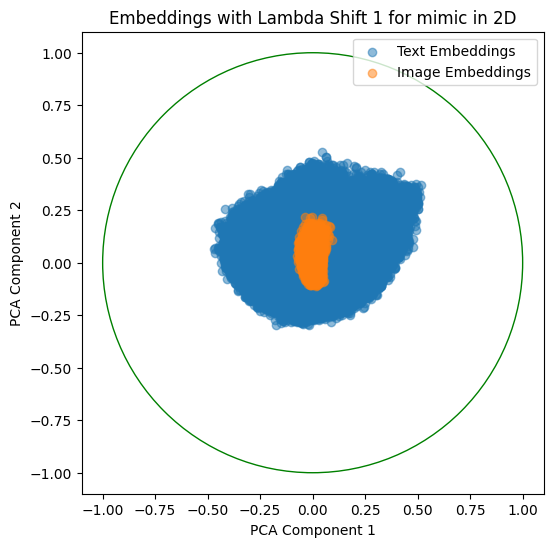

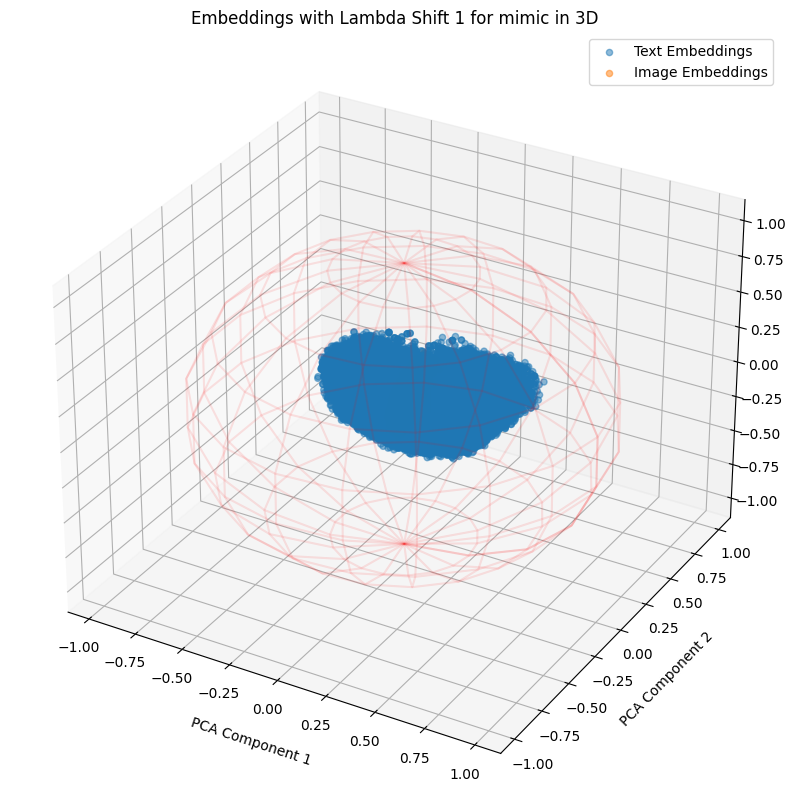

Train Shape: (107695, 1032)
Test Shape: (30360, 1032)
Training Early Fusion Model:
The number of parameters of the model are: 131972
Average Training Time per Epoch: 11.39 seconds
Total Training Time per Epoch: 569.57 seconds
Average Inference Time per Epoch: 2.05 seconds
Total Inference Time per Epoch: 102.68 seconds


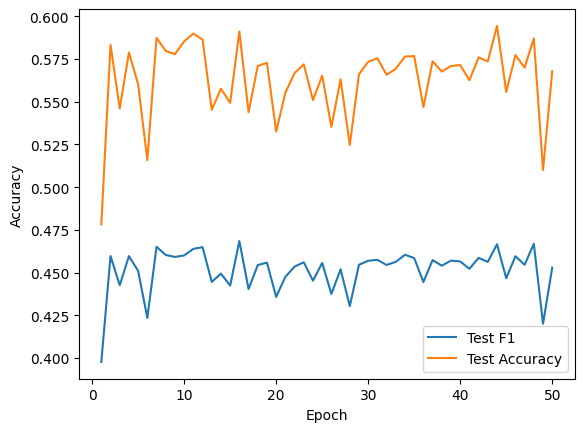

Best Accuracy: {'Acc': 0.5943675889328063, 'F1': 0.46655804573890924, 'Auc': 0.7255029433830875, 'Epoch': 44, 'Auc_Per_Class': array([0.78805834, 0.74958767, 0.6783585 , 0.68600726])}
Best Macro-F1: {'Acc': 0.5911725955204216, 'F1': 0.46841970916104536, 'Auc': 0.7265908619380963, 'Epoch': 16, 'Auc_Per_Class': array([0.79316882, 0.73768515, 0.69435701, 0.68115247])}
Best Macro-AUC: {'Acc': 0.5863636363636363, 'F1': 0.4648629581316699, 'Auc': 0.7277765736010131, 'Epoch': 12, 'Auc_Per_Class': array([0.7910373 , 0.75025764, 0.69016249, 0.67964886])}
Training Late Fusion Model:
The number of parameters of the model are: 66436
Average Training Time per Epoch: 12.04 seconds
Total Training Time per Epoch: 601.80 seconds
Average Inference Time per Epoch: 2.05 seconds
Total Inference Time per Epoch: 102.40 seconds


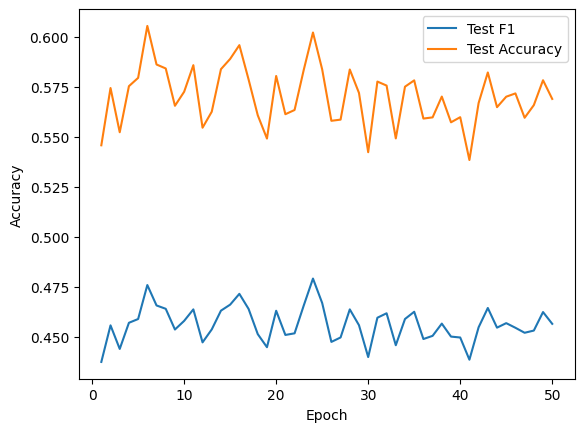

Best Accuracy: {'Acc': 0.605566534914361, 'F1': 0.47593027415331723, 'Auc': 0.7274677595606052, 'Epoch': 6, 'Auc_Per_Class': array([0.7897601 , 0.73782026, 0.69159487, 0.69069581])}
Best Macro-F1: {'Acc': 0.6022727272727273, 'F1': 0.47917995682712, 'Auc': 0.7280157577383426, 'Epoch': 24, 'Auc_Per_Class': array([0.79450599, 0.73345528, 0.70014718, 0.68395458])}
Best Macro-AUC: {'Acc': 0.5959486166007905, 'F1': 0.4715325239887166, 'Auc': 0.7304501397090126, 'Epoch': 16, 'Auc_Per_Class': array([0.79388986, 0.75111182, 0.69274569, 0.68405318])}


In [6]:
# Assuming df is your DataFrame
#lambda_shift_values = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]  # Negative values bring embeddings closer, positive values push them apart
lambda_shift_values = [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]  # Negative values bring embeddings closer, positive values push them apart

# Normalize initial embeddings
df[text_columns] = normalize_embeddings(df[text_columns].values)
df[image_columns] = normalize_embeddings(df[image_columns].values)

# Dataframe with shifted values:
df_shifted = df.copy()

results = {}

for lambda_shift in lambda_shift_values:
    
    print('#'*50, f' Shift {lambda_shift} ', '#'*50)
    
    # Extract embeddings
    text_embeddings = df[text_columns].values
    image_embeddings = df[image_columns].values
    
    # Modify and normalize embeddings
    text_embeddings_shifted, image_embeddings_shifted = modify_and_normalize_embeddings(text_embeddings, image_embeddings, lambda_shift)
    
    # Update column names based on the new dimensions
    if text_embeddings.shape[1] < text_embeddings_shifted.shape[1]:
        text_columns_updated = update_column_names(text_columns, text_embeddings_shifted.shape[1])
    else: 
        text_columns_updated = text_columns
        
    if image_embeddings.shape[1] < image_embeddings_shifted.shape[1]: 
        image_columns_updated = update_column_names(image_columns, image_embeddings_shifted.shape[1])
    else:
        image_columns_updated = image_columns
    
    # Update DataFrame with shifted embeddings
    df_shifted[text_columns_updated] = text_embeddings_shifted
    df_shifted[image_columns_updated] = image_embeddings_shifted
    
    # Visualize shifted embeddings
    visualize_embeddings(text_embeddings_shifted, image_embeddings_shifted, f'Embeddings with Lambda Shift {lambda_shift} for {DATASET}', lambda_shift, DATASET)
    
    # Split the data
    train_df, test_df = split_data(df_shifted)
    
    
    # Process and one-hot encode labels for training set
    train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
    test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)

    train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
    test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    text_input_size = len(text_columns)
    image_input_size = len(image_columns)

    ### Models:
    # Train early fusion model
    print("Training Early Fusion Model:")
    accuracy, precision, recall, f1, best = train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=multilabel, report=True, V=False)
    print(f"Best Accuracy: {best['Acc']}")
    print(f"Best Macro-F1: {best['Macro-F1']}")
    print(f"Best Macro-AUC: {best['AUC']}")
    
    results[f"early_({lambda_shift})"] = best
    
    # Train late fusion model
    print("Training Late Fusion Model:")
    accuracy, precision, recall, f1, best = train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=multilabel, report=True, V=False)
    print(f"Best Accuracy: {best['Acc']}")
    print(f"Best Macro-F1: {best['Macro-F1']}")
    print(f"Best Macro-AUC: {best['AUC']}")
    
    results[f"late_({lambda_shift})"] = best

In [7]:
print('Results Early Fusion: ')
for lambda_shift in lambda_shift_values:
    print(f'Shift = {lambda_shift}')
    print(f"Best Accuracy: {results[f'early_({lambda_shift})']['Acc']}")
    print(f"Best F1: {results[f'early_({lambda_shift})']['Macro-F1']}")
    print(f"Best AUC: {results[f'early_({lambda_shift})']['AUC']}")
    
print('Results Late Fusion: ')
for lambda_shift in lambda_shift_values:
    print(f'Shift = {lambda_shift}')
    print(f"Best Accuracy: {results[f'late_({lambda_shift})']['Acc']}")
    print(f"Best F1: {results[f'late_({lambda_shift})']['Macro-F1']}")
    print(f"Best AUC: {results[f'early_({lambda_shift})']['AUC']}")

Results Early Fusion: 
Shift = -1
Best Accuracy: {'Acc': 0.5960474308300395, 'F1': 0.4707735956552251, 'Auc': 0.7274636197512069, 'Epoch': 39, 'Auc_Per_Class': array([0.79298077, 0.74521352, 0.68773247, 0.68392772])}
Best F1: {'Acc': 0.5960474308300395, 'F1': 0.4707735956552251, 'Auc': 0.7274636197512069, 'Epoch': 39, 'Auc_Per_Class': array([0.79298077, 0.74521352, 0.68773247, 0.68392772])}
Best AUC: {'Acc': 0.5888998682476944, 'F1': 0.46520434102312747, 'Auc': 0.7276973671725325, 'Epoch': 41, 'Auc_Per_Class': array([0.79102457, 0.75511855, 0.68195013, 0.68269622])}
Shift = -0.8
Best Accuracy: {'Acc': 0.6291831357048748, 'F1': 0.4845909613626969, 'Auc': 0.7218249530873648, 'Epoch': 38, 'Auc_Per_Class': array([0.79113017, 0.72220159, 0.67190181, 0.70206624])}
Best F1: {'Acc': 0.6291831357048748, 'F1': 0.4845909613626969, 'Auc': 0.7218249530873648, 'Epoch': 38, 'Auc_Per_Class': array([0.79113017, 0.72220159, 0.67190181, 0.70206624])}
Best AUC: {'Acc': 0.5872200263504611, 'F1': 0.46742680

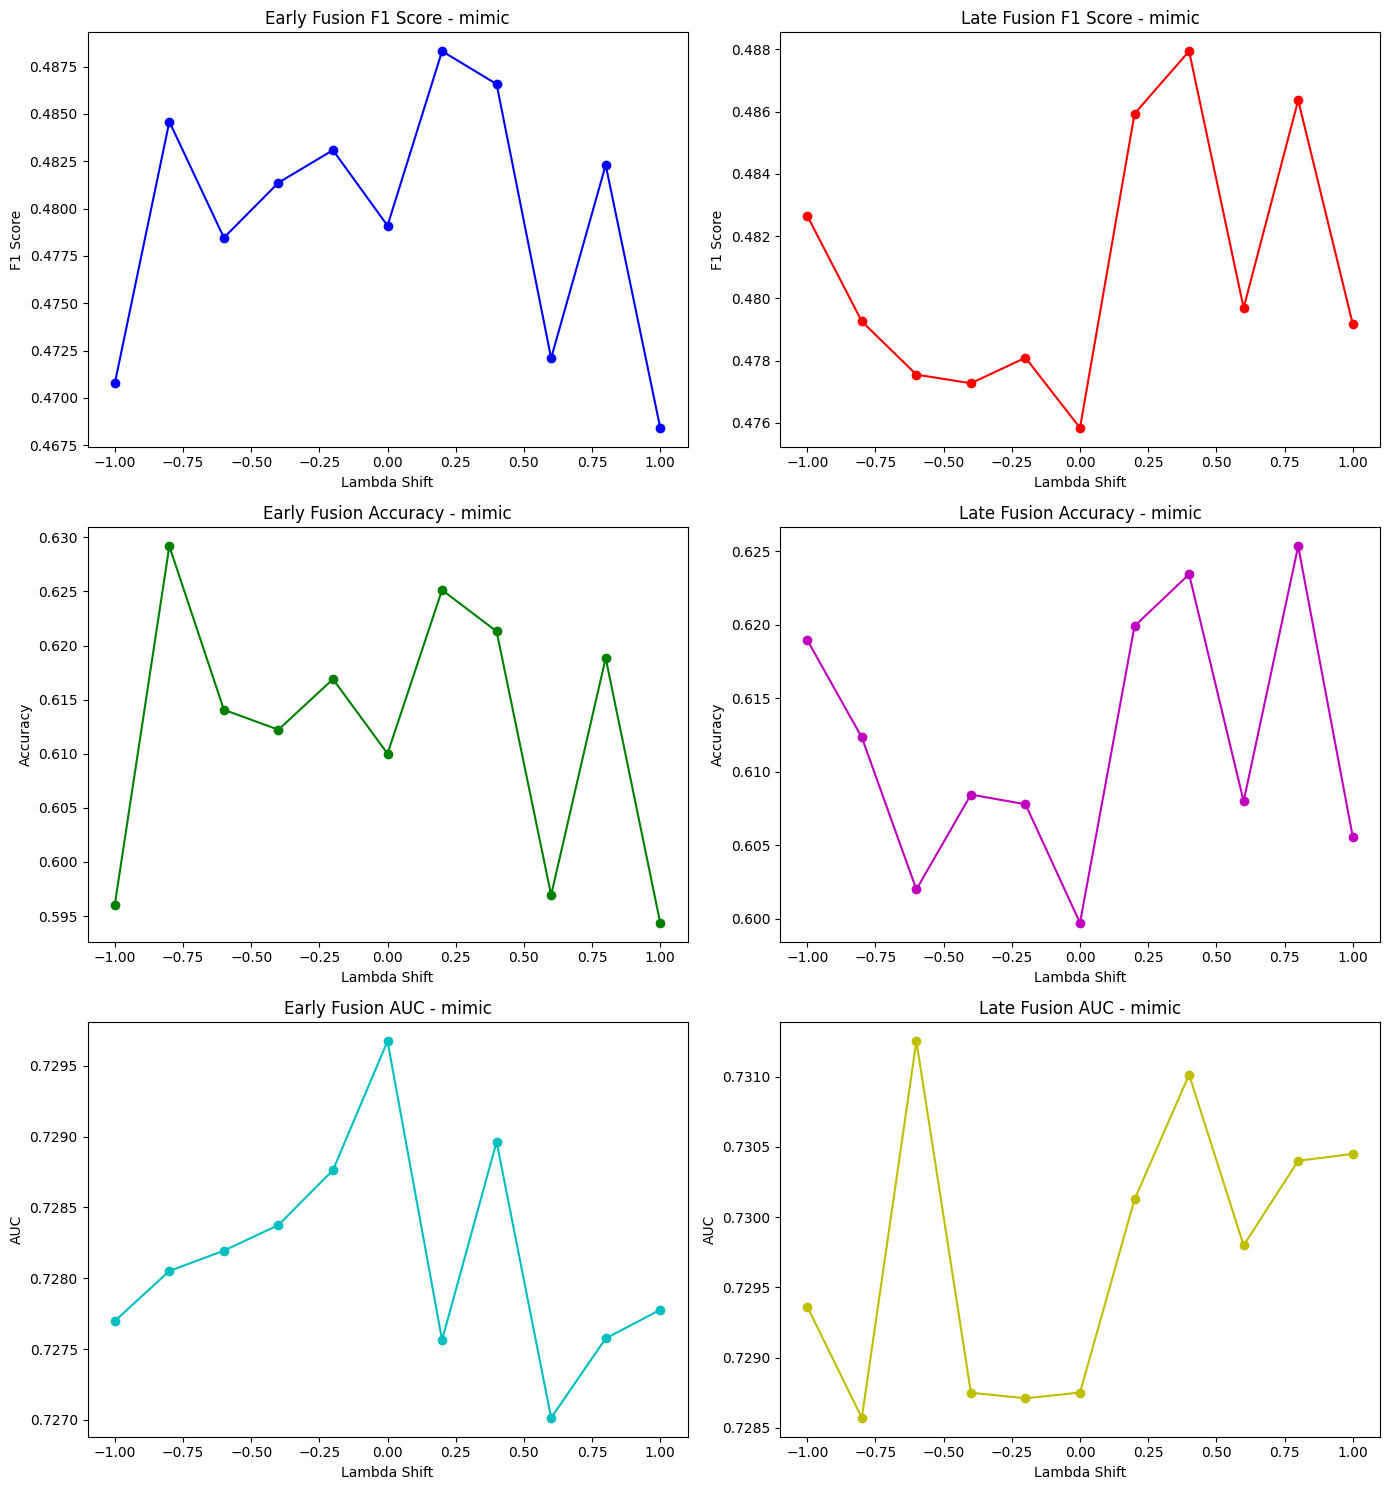

In [8]:
plot_results(results, lambda_shift_values, DATASET)